In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [23]:
df = pd.read_csv('obesity.csv')

In [24]:
print(df.shape)
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicated values:", df.duplicated().sum())

(2111, 17)
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Number of duplicated values: 0


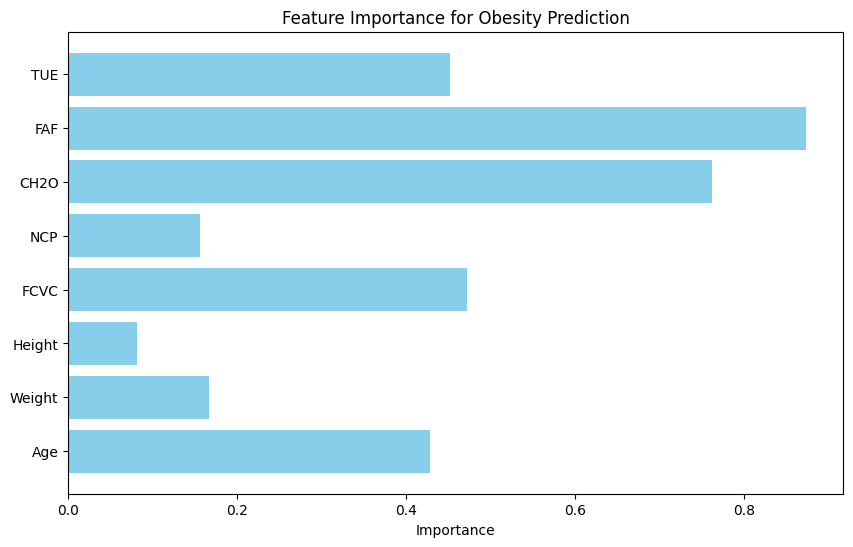

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Example feature importance (replace with actual values if available)
features = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
importance = np.random.rand(len(features))  # Replace with actual importance values

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Obesity Prediction')
plt.savefig('feature_importance.png')
plt.show()

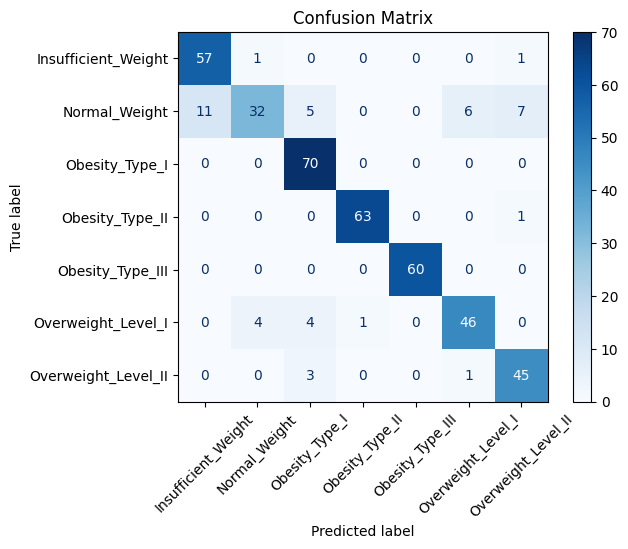

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example predictions (replace with actual y_test and predictions)
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

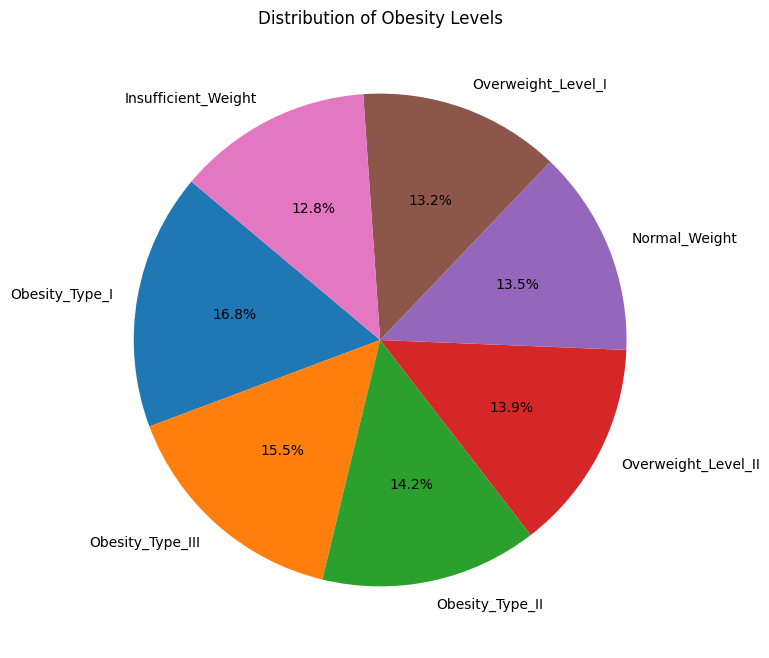

In [29]:
obesity_counts = df['NObeyesdad'].value_counts()
labels = obesity_counts.index  # These are already string labels

plt.figure(figsize=(8, 8))
plt.pie(obesity_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Obesity Levels')
plt.savefig('obesity_distribution.png')
plt.show()


C:\Users\manis\AppData\Local\Temp\ipykernel_22436\4000116444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_subset['NObeyesdad'] = label_encoder.inverse_transform(num_subset['NObeyesdad'])


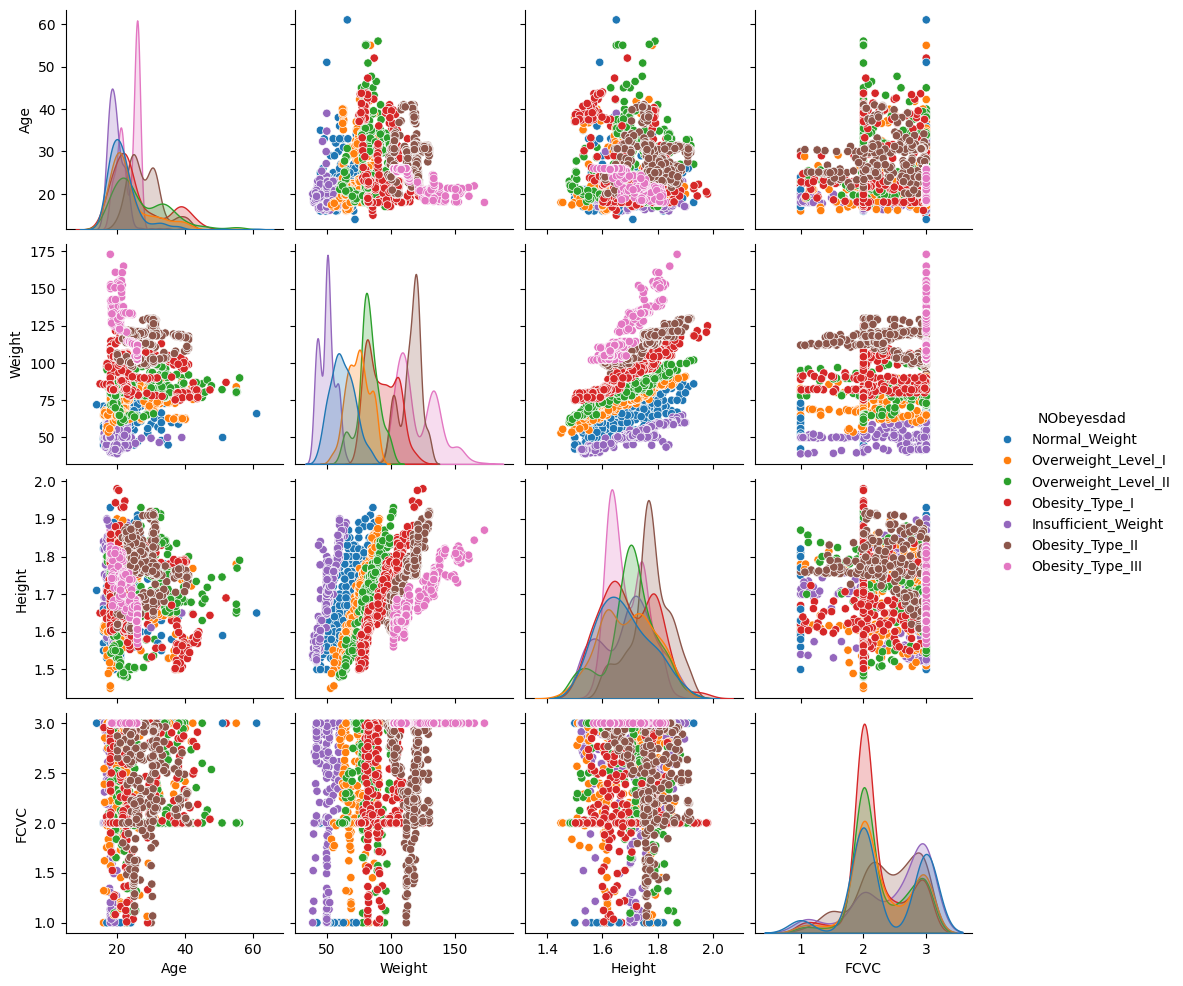

In [ ]:
import seaborn as sns

# Select a subset of numerical features for visualization
num_subset = df[['Age', 'Weight', 'Height', 'FCVC', 'NObeyesdad']]
num_subset['NObeyesdad'] = label_encoder.inverse_transform(num_subset['NObeyesdad'])

sns.pairplot(num_subset, hue='NObeyesdad', diag_kind='kde')
plt.savefig('pairplot.png')
plt.show()

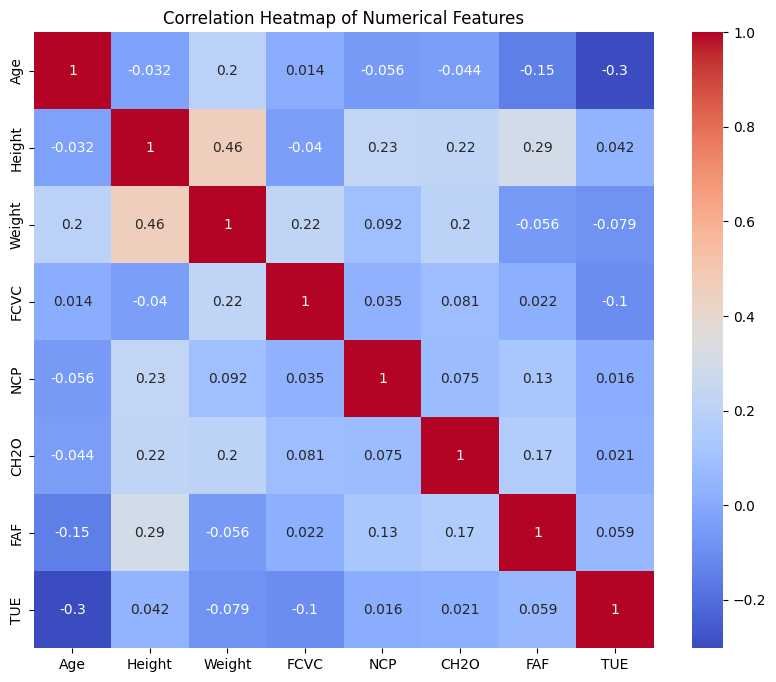

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

In [ ]:

label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [ ]:
categorical_features = ['Gender', 'family_history_with_overweight',
                        'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight',
                      'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [ ]:
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numerical_features)
    ])

In [ ]:
knn_model = KNeighborsClassifier()
pipeline = Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', knn_model)])

In [ ]:
param_grid = {'classifier__n_neighbors': [3, 5, 7, 9, 11],
              'classifier__weights': ['uniform', 'distance'],
              'classifier__p': [1, 2]}

In [ ]:
best_model = pipeline.fit(X_train, y_train)

In [ ]:
accuracy = best_model.score(X_test, y_test)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8397129186602871


In [ ]:
best_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
test_data = pd.read_csv('test.csv')
test_predictions = best_model.predict(test_data)

In [ ]:
submission_df = pd.DataFrame(
    {'id': test_data['id'], 'NObeyesdad': label_encoder.inverse_transform(test_predictions)})
submission_df.to_csv('submission.csv', index=False)